## PROBLEM
### What can we learn about different hosts and areas? - Kaggle

In [1]:
# !pip install --user arcgis==1.6.0

In [1]:
import pandas as pd

import arcgis
from arcgis.gis import GIS
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import geopandas as gpd
import matplotlib.pyplot as plt

gis = GIS(username='psheurpu_ucsd5')
print('Successfully logged in as: ' + gis.properties.user.username)

Enter password: ········
Successfully logged in as: psheurpu_ucsd5


In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
df.dropna(subset=['longitude','latitude'], how='any', inplace=True)
sdf = pd.DataFrame.spatial.from_xy(df, 'longitude', 'latitude')
sdf_less500 = sdf[sdf['price'] <= 500]

In [4]:
df.isnull().mean()

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
SHAPE                             0.000000
dtype: float64

In [5]:
priceOnlytest = sdf_less500[['price', 'longitude', 'latitude']]

In [6]:
# 
# airbnb_less500_layer = priceOnlytest.spatial.to_featurelayer('airbnbNYCLessThan500_priceonly', gis=gis)

In [7]:
sdf_less500_layer = gis.content.get('ded66366841448f8bf0d43b07707dfe6')#.layers[0].query().sdf

In [8]:
# pd.DataFrame.spatial.from_layer(airbnb_less500_layer)

In [9]:
sdf = pd.DataFrame.spatial.from_xy(df, 'longitude', 'latitude')
# airbnb_layer = sdf.spatial.to_featurelayer('airbnbNYC', gis=gis)


In [10]:
m2 = gis.map('New York, NY')
m2.add_layer(sdf_less500_layer)
m2

MapView(layout=Layout(height='400px', width='100%'))

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/tbpT11D.png")

In [11]:
# sdf_less500 = sdf[sdf['price'] < 500].copy()
# len(sdf)

<Item title:"NYC_ZIP_CODE_2014" type:Feature Layer Collection owner:prattcenter>
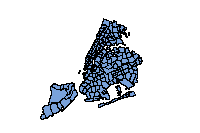

In [12]:
zipcodes = gis.content.get('7eeb21c12d884ce6ad33fd33b9b26d23')
zipcodes

In [13]:
m1 = gis.map('New York, NY')
m1.add_layer(zipcodes)
m1.add_layer(sdf_less500_layer)

m1

MapView(layout=Layout(height='400px', width='100%'))

In [15]:
Image(url= "https://i.imgur.com/j9ZBu4T.png")

In [15]:
zipcodes_layer = zipcodes.layers[0]
zipcodes_layer_sdf = pd.DataFrame.spatial.from_layer(zipcodes_layer)
zipcodes_layer_sdf.head()

FID ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY  \
0    1   11436       0   Jamaica       18681  2.269930e+07    NY  Queens   
1    2   11213       0  Brooklyn       62426  2.963100e+07    NY   Kings   
2    3   11212       0  Brooklyn       83866  4.197210e+07    NY   Kings   
3    4   11225       0  Brooklyn       56527  2.369863e+07    NY   Kings   
4    5   11218       0  Brooklyn       72280  3.686880e+07    NY   Kings   

  ST_FIPS CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      36      081  http://www.usps.com/           0          0   
1      36      047  http://www.usps.com/           0          0   
2      36      047  http://www.usps.com/           0          0   
3      36      047  http://www.usps.com/           0          0   
4      36      047  http://www.usps.com/           0          0   

                                               SHAPE  
0  {"rings": [[[-8216029.62387717, 4965683.981392...  
1  {"rings": [[[-8230673.6134866, 4965217.2196151...  
2  {"rings": [[[-8226837.9537665, 4963912.3812964...  
3  {"rings": [[[-8232964.07157416, 4963885.549142...  
4  {"rings": [[[-8234534.56010564, 4960941.753543...

In [16]:
# airbnb_layer

In [17]:
from arcgis.features import summarize_data
col_summary = summarize_data.aggregate_points(point_layer = sdf_less500_layer,
                                            polygon_layer = zipcodes_layer,
                                            keep_boundaries_with_no_points=False,
                                            summary_fields=['price Mean'])

In [18]:
less500_sdf = sdf_less500_layer.layers[0].query().sdf
less500_sdf.head()

FID    id                                              name  host_id  \
0    1  2539                Clean & quiet apt home by the park     2787   
1    2  2595                             Skylit Midtown Castle     2845   
2    3  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3    4  3831                   Cozy Entire Floor of Brownstone     4869   
4    5  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourh    neighbou_1  latitude  longitude        room_type  \
0         John   Brooklyn    Kensington  40.64749  -73.97237     Private room   
1     Jennifer  Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2    Elisabeth  Manhattan        Harlem  40.80902  -73.94190     Private room   
3  LisaRoxanne   Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4        Laura  Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_ni  number_of_  last_revie  reviews_pe  calculated  \
0    149           1           9  2018-10-19        0.21           6   
1    225           1          45  2019-05-21        0.38           2   
2    150           3           0         nan         NaN           1   
3     89           1         270  2019-07-05        4.64           1   
4     80          10           9  2018-11-19        0.10           1   

   availabili                                              SHAPE  
0         365  {"x": -8234566.561171626, "y": 4960484.7412660...  
1         355  {"x": -8235835.603366669, "y": 4976068.3121687...  
2         365  {"x": -8231174.656287155, "y": 4984212.8378376...  
3         194  {"x": -8233162.8223927235, "y": 4966010.228227...  
4           0  {"x": -8231407.314022913, "y": 4982667.2079007...

In [19]:
col_agg_fc = col_summary['aggregated_layer']
col_agg_fset = col_agg_fc.query()
col_summary['aggregated_layer'].query().sdf.head()

FID  Point_Count ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  \
0    1           43   11436       0   Jamaica       18681  2.269930e+07    NY   
1    2          550   11213       0  Brooklyn       62426  2.963100e+07    NY   
2    3           89   11212       0  Brooklyn       83866  4.197210e+07    NY   
3    4          648   11225       0  Brooklyn       56527  2.369863e+07    NY   
4    5          331   11218       0  Brooklyn       72280  3.686880e+07    NY   

   COUNTY ST_FIPS CTY_FIPS                   URL  MEAN_price  AnalysisArea  \
0  Queens      36      081  http://www.usps.com/     3171281      0.814230   
1   Kings      36      047  http://www.usps.com/   -19402600      1.062871   
2   Kings      36      047  http://www.usps.com/   -24112866      1.505548   
3   Kings      36      047  http://www.usps.com/   -33125644      0.850075   
4   Kings      36      047  http://www.usps.com/   -64603479      1.322488   

                                               SHAPE  
0  {"rings": [[[-8216029.6239, 4965683.981399998]...  
1  {"rings": [[[-8230673.613500001, 4965217.21959...  
2  {"rings": [[[-8226837.9538, 4963912.381300002]...  
3  {"rings": [[[-8232964.071599999, 4963885.54909...  
4  {"rings": [[[-8234534.5601, 4960941.7535], [-8...

## Ran into corrupted price errors after converting to feature layer :'(
I think due to how many rows there are?

In [3]:
# proportion of nulls per column
df.isnull().mean()

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [4]:
count_by_neighbor = df.groupby('neighbourhood_group').agg('count').reset_index()

In [5]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))

nyc.rename(columns={'BoroName':'neighbourhood_group'}, inplace=True)

merge_airbnb_nyc = nyc.merge(count_by_neighbor, on='neighbourhood_group')

In [6]:
merge_airbnb_nyc.head()

BoroCode neighbourhood_group     Shape_Leng    Shape_Area  \
0         5       Staten Island  330470.010332  1.623820e+09   
1         4              Queens  896344.047763  3.045213e+09   
2         3            Brooklyn  741080.523166  1.937479e+09   
3         1           Manhattan  359299.096471  6.364715e+08   
4         2               Bronx  464392.991824  1.186925e+09   

                                            geometry     id   name  host_id  \
0  MULTIPOLYGON (((970217.022 145643.332, 970227....    373    373      373   
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...   5666   5666     5666   
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  20104  20098    20104   
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  21661  21652    21661   
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...   1091   1090     1091   

   host_name  neighbourhood  latitude  longitude  room_type  price  \
0        373            373       373        373        373    373   
1       5664           5666      5666       5666       5666   5666   
2      20095          20104     20104      20104      20104  20104   
3      21652          21661     21661      21661      21661  21661   
4       1090           1091      1091       1091       1091   1091   

   minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0             373                373          314                314   
1            5666               5666         4574               4574   
2           20104              20104        16447              16447   
3           21661              21661        16632              16632   
4            1091               1091          876                876   

   calculated_host_listings_count  availability_365  
0                             373               373  
1                            5666              5666  
2                           20104             20104  
3                           21661             21661  
4                            1091              1091

## What can we learn about different hosts and areas? - Kaggle

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

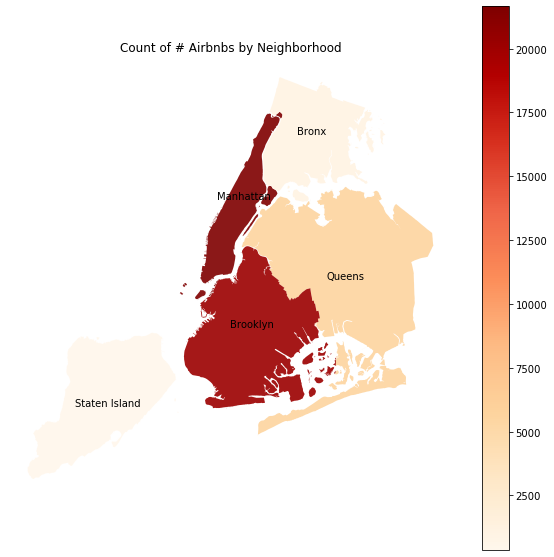

In [49]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
merge_airbnb_nyc.plot(column='id', alpha=.9, cmap='OrRd', ax=ax, legend=True)

merge_airbnb_nyc.apply(lambda x: ax.annotate(s=x.neighbourhood_group, xy=x.geometry.representative_point().coords[0], ha='center'), axis=1)
plt.title("Count of # Airbnbs by Neighborhood")
plt.axis('off')

### Brooklyn and Manhattan have the most Airbnb's! Are they the most popular places?

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

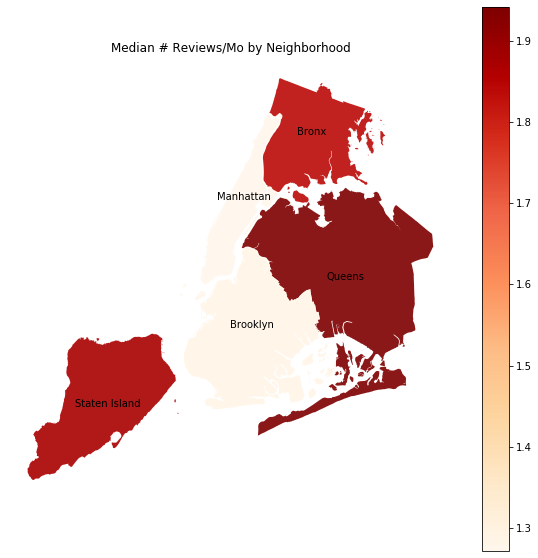

In [50]:
rev_by_neighbor = df.groupby('neighbourhood_group').agg({'reviews_per_month' : 'mean'}).reset_index()
merge_airbnb_nyc_rev = nyc.merge(rev_by_neighbor, on='neighbourhood_group')

fig,ax = plt.subplots(1,1, figsize=(10,10))
merge_airbnb_nyc_rev.plot(column='reviews_per_month', cmap= 'OrRd', alpha=.9, ax=ax, legend=True)

merge_airbnb_nyc_rev.apply(lambda x: ax.annotate(s=x.neighbourhood_group, xy=x.geometry.representative_point().coords[0], ha='center'), axis=1)
plt.title("Median # Reviews/Mo by Neighborhood")
plt.axis('off')

### It seems like Staten Island, Bronx, and Queens are actually the most popular judging by avg number of reviews per month... What could be reasons why?

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

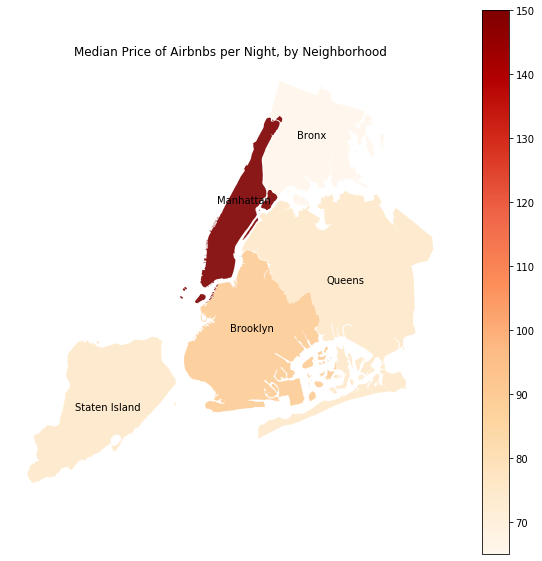

In [51]:
price_by_neighbor = df.groupby('neighbourhood_group').agg({'price' : 'median'}).reset_index()
merge_airbnb_nyc_Price = nyc.merge(price_by_neighbor, on='neighbourhood_group')

fig,ax = plt.subplots(1,1, figsize=(10,10))
merge_airbnb_nyc_Price.plot(column='price', cmap= 'OrRd', alpha=.9, ax=ax, legend=True)

merge_airbnb_nyc_Price.apply(lambda x: ax.annotate(s=x.neighbourhood_group, xy=x.geometry.representative_point().coords[0], ha='center'), axis=1)
plt.title("Median Price of Airbnbs per Night, by Neighborhood")
plt.axis('off')

In [52]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

data = px.data.gapminder()

fig = go.Figure()
df2 = df[df['price'] <= 500]

neighborhoods = ['Bronx', 'Staten Island', 'Queens', 'Brooklyn', 'Manhattan']

for group in neighborhoods:
    fig.add_trace(go.Violin(x=df2[df2['neighbourhood_group'] == group]['neighbourhood_group'],
                            y=df2[df2['neighbourhood_group'] == group]['price'],
                            name=group,
                            box_visible=True,
                            meanline_visible=True))
    
fig.update_layout(
    title="Price Distribution by Neighborhood (Price <= $500) Sorted by Median",
    xaxis_title="Neighborhood Group",
    yaxis_title="Price ($)")
# fig = ff.create_distplot(data_neighbor['price'].tolist() , data_neighbor['neighbourhood_group'].tolist(), bin_size=50, show_hist=False)
fig.show()

### They are the cheapest places for Airbnbs! (of course, could also be other reasons) But assuming if cheaper is better, is it still profitable for the Airbnb hosts?

In [53]:
# df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# avg_num_reviews = df.groupby('neighbourhood_group').agg({'id' : 'count' , 'price':'median' , 'reviews_per_month' : 'mean'}).sort_values('reviews_per_month', ascending=False).reset_index()

# fig = px.bar(avg_num_reviews, x='neighbourhood_group', y='reviews_per_month', color='id', height=400)
# fig.update_layout(
#     title="Average # Reviews per Month",
#     xaxis_title="Neighborhood Group",
#     yaxis_title="# of Reviews per Month",
#     coloraxis_colorbar=dict(
#     title="# of Listings")
# )
# fig.show()

### Come up with a quick way to estimate yearly income of hosts? 

#### Inside Airbnb site says they use a mix of reviews, minimum number of nights, and the cost per night to estimate.

### Let's assume a conservative 50% review rate to help convert reviews per month to number of bookings per month. 
Just using anecdotal evidence from reddit and blogs (https://ourbnb.com/blog/what-percentage-of-guests-leave-a-review/) from hosts. Not important to find actual income, just want to know how the incomes compare proportionally.

In [54]:
# this is how much each host makes on average per airbnb they own per neigborhood
host_income = df.copy()
host_income['price_times_minNights'] = host_income['minimum_nights'] * host_income['price']

host_income = host_income.groupby(['neighbourhood_group','id']).agg({'price_times_minNights' : 'mean', 'name' : 'count', 'reviews_per_month' : 'mean'})
# impute reviews_per_month with median number of reviews per month
host_income['reviews_per_month'] = host_income['reviews_per_month'].fillna(0)
# could instead impute with the nearest x,y point, or nearest neighbors with non-nan value


host_income.head()

booking_rate_per_review = 2
months_in_year = 12
host_income['est_income'] = host_income['price_times_minNights'] * host_income['reviews_per_month'] * booking_rate_per_review * months_in_year
host_income.head()

price_times_minNights  name  reviews_per_month  \
neighbourhood_group id                                                      
Bronx               44096                     40     1               2.04   
                    54626                     45     1               1.45   
                    63588                    180     1               0.00   
                    63610                    210     1               0.50   
                    71812                   2700     1               0.35   

                           est_income  
neighbourhood_group id                 
Bronx               44096      1958.4  
                    54626      1566.0  
                    63588         0.0  
                    63610      2520.0  
                    71812     22680.0

In [55]:
len(host_income)

48895

In [56]:
host_income[host_income['est_income'] == host_income['est_income'].max()]

price_times_minNights  name  reviews_per_month  \
neighbourhood_group id                                                        
Manhattan           4932139                  68508     1               2.96   

                             est_income  
neighbourhood_group id                   
Manhattan           4932139  4866808.32

### Estimated yearly income from Airbnb overall

In [57]:
# ax = host_income['est_income'].plot.hist(range=(0,100000), bins = 100)

fig = px.histogram(host_income[host_income['est_income'] < 1000000], x="est_income", log_y=True)
fig.show()

In [58]:
# # this is how much each host makes on average per airbnb they own per neigborhood
# host_income = df.copy()
# host_income['price_times_minNights'] = host_income['minimum_nights'] * host_income['price']

# host_income = host_income.groupby(['neighbourhood_group','host_id']).agg({'price_times_minNights' : 'mean', 'id' : 'count', 'reviews_per_month' : 'mean'})
# # impute reviews_per_month with median number of reviews per month
# # host_income['reviews_per_month'] = host_income['reviews_per_month'].fillna(0)
# host_income.dropna(subset=['reviews_per_month'], inplace=True)
# host_income.head()

# booking_rate_per_review = 2
# months_in_year = 12
# host_income['est_income'] = host_income['price_times_minNights'] * host_income['reviews_per_month'] * booking_rate_per_review * months_in_year
# host_income.head()

In [59]:
# len(host_income)

In [60]:
# # ax = host_income['est_income'].plot.hist(range=(0,100000), bins = 100)

# fig = px.histogram(host_income[host_income['est_income'] < 1000000], x="est_income", log_y=True)
# fig.show()

In [61]:
neighborhoods = ['Bronx', 'Staten Island', 'Queens', 'Brooklyn', 'Manhattan']
host_income2= host_income[host_income['est_income'] < 1000000].reset_index()
fig2 = go.Figure()
for group in neighborhoods:
    fig2.add_trace(go.Violin(x=host_income2[host_income2['neighbourhood_group'] == group]['neighbourhood_group'],
                            y=host_income2[host_income2['neighbourhood_group'] == group]['est_income'],
                            name=group,
                            box_visible=True,
                            meanline_visible=True))
    
fig2.update_layout(
    title="Est Yearly Income by Neighborhood",
    xaxis_title="Neighborhood Group",
    yaxis_title="Est Income")

fig2.show()

In [62]:
# # ESTIMATED INCOME OF AIRBNB
# host_income = df.groupby(['neighbourhood_group','id']).agg({'price_times_minNights' : 'mean', 'id' : 'count', 'reviews_per_month' : 'mean'})
# host_income.head()

## Interesting Skew in Estimated Income

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

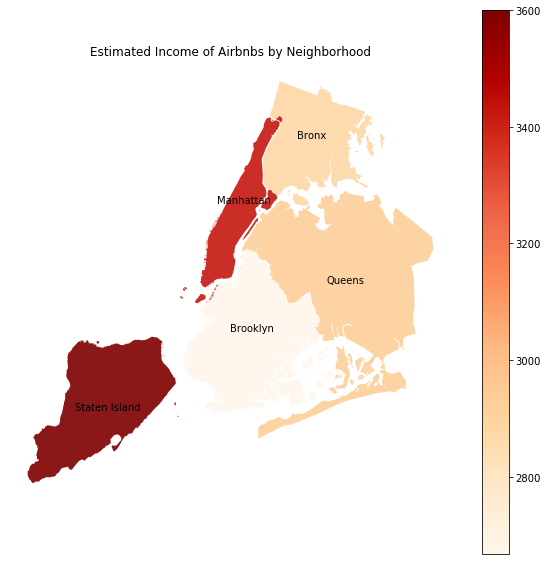

In [65]:
inc_by_neighbor = host_income[host_income['est_income'] < 1000000].groupby('neighbourhood_group').agg({'est_income' : 'median'}).reset_index()
merge_airbnb_nyc_Inc = nyc.merge(inc_by_neighbor, on='neighbourhood_group')

fig,ax = plt.subplots(1,1, figsize=(10,10))
merge_airbnb_nyc_Inc.plot(column='est_income', cmap= 'OrRd', alpha=.9, ax=ax, legend=True)

merge_airbnb_nyc_Inc.apply(lambda x: ax.annotate(s=x.neighbourhood_group, xy=x.geometry.representative_point().coords[0], ha='center'), axis=1)
plt.title("Estimated Income of Airbnbs by Neighborhood")
plt.axis('off')

### The median est income for Airbnb's is highest in Staten Island but...

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

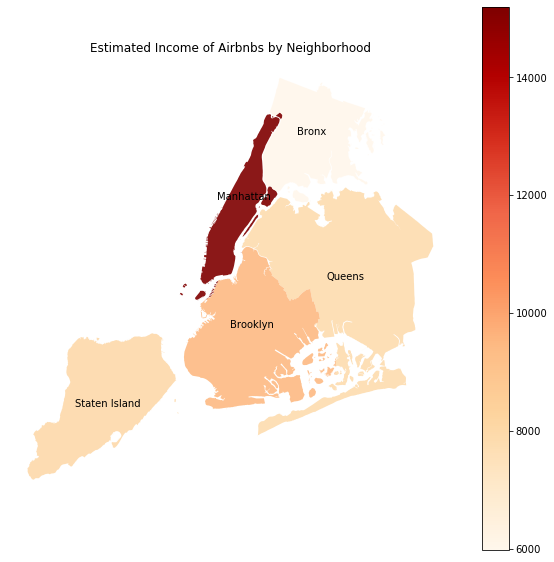

In [66]:
inc_by_neighbor = host_income[host_income['est_income'] < 1000000].groupby('neighbourhood_group').agg({'est_income' : 'mean'}).reset_index()
merge_airbnb_nyc_Inc = nyc.merge(inc_by_neighbor, on='neighbourhood_group')

fig,ax = plt.subplots(1,1, figsize=(10,10))
merge_airbnb_nyc_Inc.plot(column='est_income', cmap= 'OrRd', alpha=.9, ax=ax, legend=True)

merge_airbnb_nyc_Inc.apply(lambda x: ax.annotate(s=x.neighbourhood_group, xy=x.geometry.representative_point().coords[0], ha='center'), axis=1)
plt.title("Estimated Income of Airbnbs by Neighborhood")
plt.axis('off')

### Manhattan has a lot of high earners pulling the average up, so it seems there is a lot of potential in Manhattan Airbnb's. The average number of reviews is probably being pulled down by the number of Airbnb's in the area, thus leading us to believe it is less profitable.

### Future things to look at: 
#### 1. What makes a good Airbnb? Look at locations of the high earners we found, what they have in common, etc. Look into the features of the area.
#### 2. Compare prices of Airbnb's to leases housing prices and hotel prices, and determine effect of Airbnb on NYC population.